In [2]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc, f1_score, accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve 
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('data/model_data.csv')

X_train = pd.read_csv('data/X_train_transformed.csv')
X_test = pd.read_csv('data/X_test_transformed.csv')
y_train = pd.read_csv('data/y_train_transformed.csv')
y_test = pd.read_csv('data/y_test_transformed.csv')

#this step is necessary because we are using the already splot data inside the pycaret setup, and indexes must not overlap on the train and test data sets

# #combine balanced train data back into a single df
# X_train['subscribed'] = y_train
# train_data = X_train

# #combine test data back into a single df
# X_test['subscribed'] = y_test
# test_data = X_test.set_index( np.arange(len(X_train), len(X_train)+len(X_test)))

# X=train_data.drop(labels=['subscribed'], axis=1)
# y=train_data['subscribed']

In [ ]:
X_train.info()

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

#Define the model
def nn_model():
    model = Sequential()
    model.add(Dense(53, input_shape=(53,), activation='relu')) #Input layer
    model.add(Dense(34, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) #Output layer

    #Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#Declare parameteres

# param_grid = {
#     'batch_size': [16,32,64],
#     'epochs': [5,10,15]
# }

# grid_search = GridSearchCV(
#     estimator=KerasClassifier(build_fn=nn_model),
#     param_grid=param_grid,
#     cv=10
# )

#result = grid_search.fit(X_train,y_train)
#Optimize parameteres

#Fit the model
model = nn_model()
model.fit(X_train, y_train,batch_size = 17064, epochs = 64)


Epoch 1/64
3/3 [==============================] - 1s 23ms/step - loss: 1.6841 - accuracy: 0.4998
Epoch 2/64
3/3 [==============================] - 0s 20ms/step - loss: 0.8581 - accuracy: 0.4627
Epoch 3/64
3/3 [==============================] - 0s 18ms/step - loss: 0.8797 - accuracy: 0.4996
Epoch 4/64
3/3 [==============================] - 0s 16ms/step - loss: 0.9248 - accuracy: 0.5000
Epoch 5/64
3/3 [==============================] - 0s 32ms/step - loss: 0.7644 - accuracy: 0.5092
Epoch 6/64
3/3 [==============================] - 0s 22ms/step - loss: 0.6897 - accuracy: 0.5481
Epoch 7/64
3/3 [==============================] - 0s 22ms/step - loss: 0.6969 - accuracy: 0.5340
Epoch 8/64
3/3 [==============================] - 0s 20ms/step - loss: 0.6640 - accuracy: 0.5858
Epoch 9/64
3/3 [==============================] - 0s 21ms/step - loss: 0.6339 - accuracy: 0.6660
Epoch 10/64
3/3 [==============================] - 0s 19ms/step - loss: 0.6303 - accuracy: 0.6672
Epoch 11/64
3/3 [============

In [ ]:
#grid_search.best_estimator_

In [4]:
# evaluate the model
model.evaluate(X_test, y_test,batch_size=128)


97/97 [==============================] - 0s 1ms/step - loss: 0.5104 - accuracy: 0.7636


[0.5104081630706787, 0.7635966539382935]

In [10]:
predicts = model.predict(X_test)
predicts

evaluate_data = X_test.copy()
evaluate_data['subscribed'] = y_test
evaluate_data['prediction_score'] = predicts
evaluate_data['prediction_label'] = np.where(evaluate_data.prediction_score > 0.5, 1, 0)
evaluate_data

387/387 [==============================] - 1s 2ms/step


,age,job_blue-collar,job_services,job_entrepreneur,job_admin.,job_management,job_technician,job_housemaid,job_unemployed,job_retired,...,poutcome_nonexistent,poutcome_failure,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,subscribed,prediction_score,prediction_label
0,34.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,2.0,4.0,0.0,0,0.584009,1
1,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0,0.799088,1
2,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,3.0,2.0,2.0,0,0.290937,0
3,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,4.0,1.0,3.0,0,0.184112,0
4,52.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,2.0,3.0,3.0,0,0.177547,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12351,32.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0,0.694001,1
12352,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1,0.691918,1
12353,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,2.0,1.0,3.0,0,0.100229,0
12354,45.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0.556163,1


In [ ]:
#save the nn model
model.save('classifier_nn')



In [ ]:
reloaded_model = tf.keras.models.load_model('classifier_nn')

predictions = reloaded_model.predict(X_train)

print(
    "This particular client had a %.1f percent probability "
    "of subscribing to a term deposit, as evaluated by our model." % (150 * predictions[0][0],)
)



In [ ]:
#SHAP
import shap

background = X_train.iloc[np.random.choice(X_train.shape[0], 100, replace=False)]

e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(X_test[1:5])

# plot the feature attributions
shap.beeswarm(shap_values)

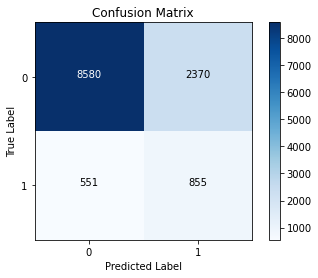

In [12]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_true = evaluate_data['subscribed']
y_pred = evaluate_data['prediction_label']
cm = confusion_matrix(y_true, y_pred)

# disp.plot()

# plt.show()

# cm

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_true)))
plt.xticks(tick_marks, np.unique(y_true))
plt.yticks(tick_marks, np.unique(y_true))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the confusion matrix cells with values
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Show the plot
plt.show()



In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85     10950
           1       0.27      0.61      0.37      1406

    accuracy                           0.76     12356
   macro avg       0.60      0.70      0.61     12356
weighted avg       0.86      0.76      0.80     12356



In [19]:
predicts

array([[0.58400875],
       [0.79908824],
       [0.29093656],
       ...,
       [0.10022936],
       [0.5561628 ],
       [0.35621846]], dtype=float32)

In [16]:
from sklearn.metrics import roc_curve

from numpy import argmax

fpr, tpr, thresholds = roc_curve(y_test,predicts)

# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))



Best Threshold=0.560513


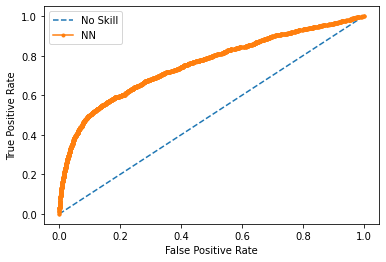

In [17]:
from matplotlib import pyplot
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='NN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Kappa metric for test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_true,y_pred)

In [ ]:
#Train data reeults
train_predicts = model.predict(X_train)
train_predicts

train_evaluate = X_train.copy()
train_evaluate['subscribed'] = y_train
train_evaluate['prediction_score'] = train_predicts
train_evaluate['prediction_label'] = np.where(train_evaluate.prediction_score > 0.5, 1, 0)
train_evaluate



In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_train_true = train_evaluate['subscribed']
y_train_pred = train_evaluate['prediction_label']
cm = confusion_matrix(y_train_true, y_train_pred)

# disp.plot()

# plt.show()

# cm

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_true)))
plt.xticks(tick_marks, np.unique(y_true))
plt.yticks(tick_marks, np.unique(y_true))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the confusion matrix cells with values
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Show the plot
plt.show()


In [ ]:

from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
roc_auc_score(y_train, train_predicts)

#RocCurveDisplay.from_predictions(y_true, y_pred)

# plt.show()

In [ ]:
cohen_kappa_score(y_train_true,y_train_pred)

In [ ]:
#youden j = 0.39
